# Pozo armónico

In [1]:
import openmm as mm
from openmm import unit
from openmm import app
import numpy as np
from matplotlib import pyplot as plt

## Creamos el sistema

In [2]:
system = mm.System()

In [3]:
system.addParticle(39.948 * unit.amu) # masa del átomo de argón

0

In [4]:
system.getNumParticles()

1

# Añadimos el potencial externo

In [5]:
force = mm.CustomExternalForce('(K/2.0) * (x^2 + y^2 + z^2)')

In [6]:
force.addGlobalParameter('K',  100.0 * unit.kilocalories_per_mole/unit.angstrom**2)

0

In [7]:
force.addParticle(0)

0

In [8]:
system.addForce(force)

0

## Estado termodinámico

In [9]:
# Formalismo NVT
temperature = 0.0*unit.kelvin
pressure    = None

## Parametros de la simulación

In [10]:
integration_timestep = 2.0*unit.femtoseconds
saving_timestep = 0.01*unit.picoseconds
simulation_time = 5*unit.picoseconds

saving_steps = int(saving_timestep/integration_timestep)
num_saving_steps = int(simulation_time/saving_timestep)

## Integrador

In [11]:
friction   = 100.0/unit.picosecond
integrator = mm.LangevinIntegrator(temperature, friction, integration_timestep)

## Plataforma

In [12]:
platform = mm.Platform.getPlatformByName('CUDA')

## Reporteros

In [13]:
times = np.zeros(num_saving_steps, np.float32) * unit.picoseconds
positions  = np.zeros([num_saving_steps,3], np.float32) * unit.angstroms
velocities = np.zeros([num_saving_steps,3], np.float32) * unit.angstroms/unit.picosecond
potential_energies   = np.zeros([num_saving_steps], np.float32) * unit.kilocalories_per_mole
kinetic_energies     = np.zeros([num_saving_steps], np.float32) * unit.kilocalories_per_mole

## Condiciones iniciales

In [14]:
initial_positions  = [[1.0, 0.0, 0.0]] * unit.angstroms

## Creamos el contexto

In [15]:
context = mm.Context(system, integrator, platform)

In [16]:
context.setPositions(initial_positions)

In [17]:
#context.setVelocitiesToTemperature(temperature)

## Llenamos los reporteros para el paso 0

In [18]:
state = context.getState(getEnergy=True, getPositions=True, getVelocities=True)

In [19]:
times[0] =  state.getTime()
positions[0] = state.getPositions()[0]
velocities[0] = state.getVelocities()[0]
kinetic_energies[0]=state.getKineticEnergy()
potential_energies[0]=state.getPotentialEnergy()

## Corriendo la simulación

In [20]:
for ii in range(num_saving_steps):
    context.getIntegrator().step(saving_steps)
    state_xx = context.getState(getEnergy=True, getPositions=True, getVelocities=True)
    times[ii] = state_xx.getTime()
    positions[ii] = state_xx.getPositions()[0]
    velocities[ii] = state_xx.getVelocities()[0]
    kinetic_energies[ii]=state_xx.getKineticEnergy()
    potential_energies[ii]=state_xx.getPotentialEnergy()
    #print('Paso',ii,'con tiempo', state_xx.getTime())

## Representamos los datos de la simulación

### Trayectoria

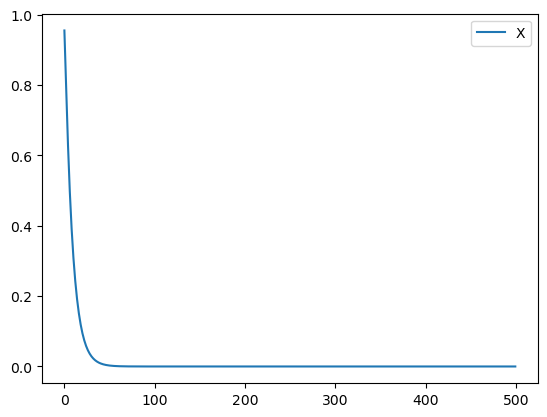

In [21]:
plt.plot(positions[:,0], label='X')
plt.legend()
plt.show()

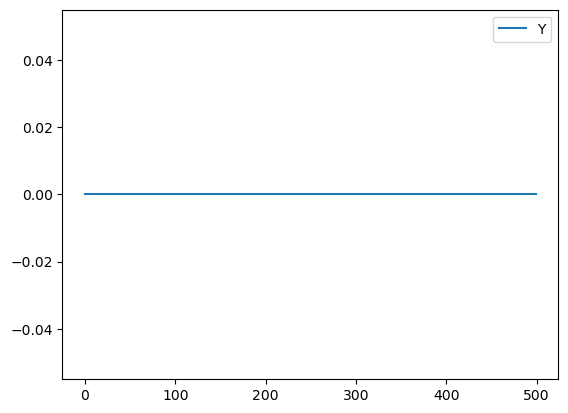

In [22]:
plt.plot(positions[:,1], label='Y')
plt.legend()
plt.show()

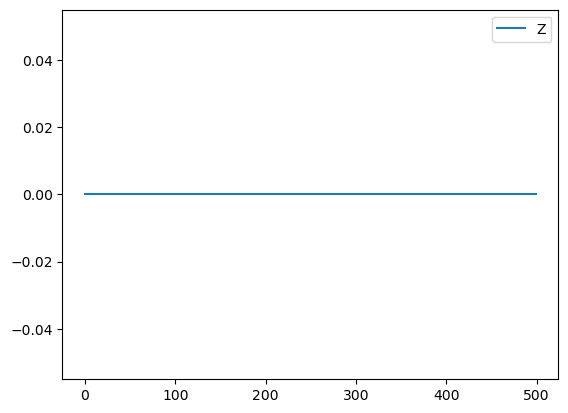

In [23]:
plt.plot(positions[:,2], label='Z')
plt.legend()
plt.show()

- Qué pasa cuando Temp=0 y fricc=0
- Qué pasa cuando Temp=0 y fricc!=0
- Qué pasa cuando Temp!=0 y fricc=0
- Qué pasa cuando Temp!=0 y fricc!=0